In [43]:
import node  
import importlib 
import random
import simulator
import packet
import pandas as pd
import networkx as nx

# Simulator

## Example of node 

In [103]:
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(2)

a = Node('A','fast')

b = Node('B','static')

# Simulation

In [229]:
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(9)


##############################
# PARAMETERS
##############################
#simulation setup
radius = 50
arrival_rate = 1/10
energy_per_packet = 5
deltaP = 0.3 #sigma
deltaW = 0.3 #beta
alpha = 0.001 #alpha
simulation_len = 500
last_generated_packet = simulation_len #/10

debug = False
num_dev = 30
###############################



s= Simulator(num_dev/(300*150), 
             classes = {'static':30, 'slow':50, 'fast':20} ,
             arrival_rate = arrival_rate,
             energy_per_packet = energy_per_packet,
             deltaP = deltaP,
             deltaW = deltaW, 
             alpha = alpha,
             debug = debug)

generated_pcks = []
received_pcks = []
dropped_pcks = []
energy_consumption = []
remaining_energy = []
P_succ = []
W_sum = []
generated_counter = 0

for i in range(simulation_len):
    
    #update distances, B and P_succ of near nodes
    s.update_nodes_info()
    
    #print(s.nodes_positions)
    
    #generate new pkts
    if generated_counter < last_generated_packet:
        generated_counter += 1
        generated_pcks.append(s.generate_packets())
    
    #for every node with at least a packet start the diffusion
    # a node decide to who he wants to send the packet
    # the reveiver decide if he wants to accept it
    # -> link weights and P_succ update 
    
    rec, drop, energy =  s.communicate(mode = "MD")
    received_pcks.append(rec)
    energy_consumption.append(energy)
    dropped_pcks.append(drop)
    
    s.charge_nodes()
    remaining_energy.append(sum([node.energy for node in s.nodes]))
    P_succ.append(sum([node.P_succ for node in s.nodes]))
    W_sum.append(sum([i[2] for i in s.graph.edges(data =  'weight')]))
    

                
    # move nodes
    s.move_nodes()
    
    
    print( '(' + str(i) +')', end = ' ')

    

(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

# Plot

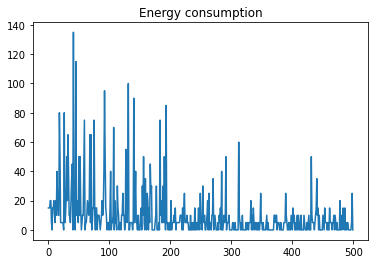

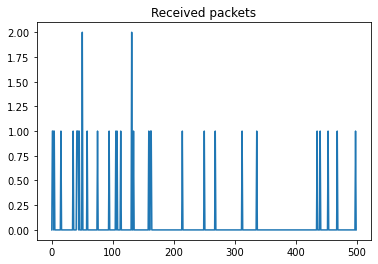

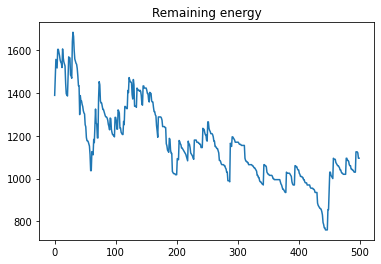

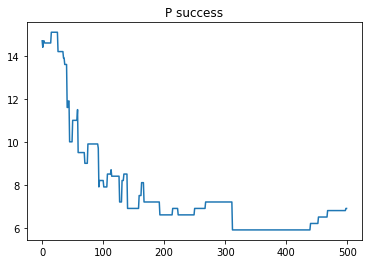

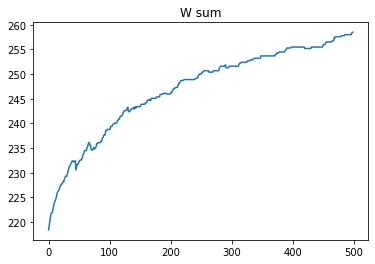

Received packets = 2.2282241728561782%
Dropped packets = 9.453072248480757%
Packet still in the system: 0.8858879135719109%


In [230]:
import matplotlib.pyplot as plt
plt.plot(range(simulation_len),energy_consumption)
plt.title("Energy consumption")
plt.show()

plt.plot(range(simulation_len),received_pcks)
plt.title("Received packets")
plt.show()

plt.plot(range(simulation_len),remaining_energy)
plt.title("Remaining energy")
plt.show()

plt.plot(range(simulation_len),P_succ)
plt.title("P success")
plt.show()

plt.plot(range(simulation_len),W_sum)
plt.title("W sum")
plt.show()

print('Received packets = ' + str(sum(received_pcks)/sum(generated_pcks)*100) + '%')
print('Dropped packets = ' + str(sum(dropped_pcks)/sum(generated_pcks)*100) + '%')
print('Packet still in the system: ' + str(sum([len(node.packet_list) for node in s.nodes])/sum(generated_pcks)) + '%')

# Animation

In [222]:
node_pos = [node.past_positions for node in s.nodes]
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib import animation


# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot() #plt.subplot(1,1,1)

ax2.set_xlim((0,10))
ax2.set_ylim((0,5))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Position')


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
#line3, = ax2.plot([], [], 'y', lw=2)

x_nodes_pos = np.array([node_pos[0,0] for node_pos in node_pos])/30
y_nodes_pos = np.array([node_pos[0,1] for node_pos in node_pos])/30    
circle_patches = []
for dev in range(len(x_nodes_pos)):
    circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos[dev]), radius/30, color='c', linestyle = '--', fill=False)
    #circle.center = (5, 5)
    circle_patches.append(circle)
    ax2.add_patch(circle)
plt.close()

# animation function. This is called sequentially
def drawframe(n):
    #x = np.linspace(0, 2, 1000)
    #y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    #y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    
    #line1.set_data(x, y1)
    #line2.set_data(x, y2)
    
    #line3.set_data(pos[n][0],pos[n][1])
    
    x_nodes_pos = np.array([node_pos[n,0] for node_pos in node_pos])/30
    y_nodes_pos = np.array([node_pos[n,1] for node_pos in node_pos])/30
    pt1.set_data(x_nodes_pos, y_nodes_pos)
    for dev in range(len(x_nodes_pos)):
        #circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos), 0.5, color='b', fill=False)
        
        circle_patches[dev].center = (x_nodes_pos[dev], y_nodes_pos[dev])
            
    #txt_title.set_text('Frame = {0:4d}'.format(n))
    return [pt1] + circle_patches,

pt1, = ax2.plot([], [], 'g.', ms=10)

# blit=True re-draws only the parts that have changed.
#interval = time
anim = animation.FuncAnimation(fig, drawframe, frames=simulation_len, interval=70, blit=False)

HTML(anim.to_html5_video())
